<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab4(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## **Develop a program to perform policy evaluation and improvement for a given MDP**

### Step 1: Define the MDP

The `MDP` class is defined to model the environment, including:
- **States**: A list of possible states.
- **Actions**: A list of possible actions.
- **Transition Probabilities (`transition_probs`)**: A dictionary where `transition_probs[s][a][next_state]` gives the probability of transitioning from state `s` to `next_state` when action `a` is taken.
- **Rewards (`rewards`)**: A dictionary where `rewards[s][a][next_state]` provides the reward received when moving from `s` to `next_state` via action `a`.
- **Discount Factor (`gamma`)**: A value between 0 and 1 that determines how much future rewards are valued compared to immediate rewards.

### Step 2: Policy Evaluation

The `policy_evaluation` method calculates the expected reward (value) for each state under the current policy. It iteratively updates each state's value until the changes are smaller than a set threshold, meaning convergence is reached.

### Step 3: Policy Improvement

The `policy_improvement` method updates the policy by checking each action's potential reward for each state. It calculates the value of each action and picks the one that yields the maximum expected return. If the policy stabilizes (i.e., doesn’t change), it signals that we have the optimal policy.


### Step 4: Policy Iteration

The `policy_iteration` method combines the above steps. It alternates between policy evaluation and policy improvement until the policy no longer changes, meaning it’s optimal.

In [6]:
class MDP:
    def __init__(self, states, actions, transition_probs, rewards, gamma=0.9):
        self.states = states
        self.actions = actions
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.gamma = gamma
        self.value_function = np.zeros(len(states))
        self.policy = np.zeros(len(states), dtype=int)
    def policy_evaluation(self, threshold=1e-6):
        while True:
            delta = 0
            for s in self.states:
                v = self.value_function[s]
                action = self.policy[s]
                self.value_function[s] = sum([
                    self.transition_probs[s][action][next_state] *
                    (self.rewards[s][action][next_state] + self.gamma * self.value_function[next_state])
                    for next_state in self.states
                ])
                delta = max(delta, abs(v - self.value_function[s]))
            if delta < threshold:
                break
    def policy_improvement(self):
        policy_stable = True
        for s in self.states:
            old_action = self.policy[s]
            action_values = np.zeros(len(self.actions))
            for a in self.actions:
                action_values[a] = sum([
                    self.transition_probs[s][a][next_state] *
                    (self.rewards[s][a][next_state] + self.gamma * self.value_function[next_state])
                    for next_state in self.states
                ])
            self.policy[s] = np.argmax(action_values)
            if old_action != self.policy[s]:
                policy_stable = False
        return policy_stable
    def policy_iteration(self):
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        return self.policy, self.value_function

states = [0, 1, 2]
actions = [0, 1]
transition_probs = {
    0: {0: [0.8, 0.2, 0], 1: [0.1, 0.7, 0.2]},
    1: {0: [0, 1, 0], 1: [0.4, 0.4, 0.2]},
    2: {0: [0.3, 0.3, 0.4], 1: [0.5, 0.1, 0.4]}}
rewards = {
    0: {0: [0, 0, 0], 1: [0, 1, 0]},
    1: {0: [0, 0, 0], 1: [0, 1, 0]},
    2: {0: [0, 0, 0], 1: [0, 1, 0]}}

mdp = MDP(states, actions, transition_probs, rewards)
optimal_policy, optimal_value_function = mdp.policy_iteration()

print("Optimal Policy:", optimal_policy)
print("Optimal Value Function:", optimal_value_function)

Optimal Policy: [1 1 1]
Optimal Value Function: [4.47473966 4.23851945 3.89859261]


1. **Optimal Policy**: `[1, 1, 1]`
   - This array represents the best action to take in each state (`S0`, `S1`, `S2`).
   - Since each element in the array is `1`, the optimal policy suggests that for each state, you should choose action `1`.
   - This means that, regardless of which state you're in, action `1` yields the highest expected return in the long run according to the computed policy.

2. **Optimal Value Function**: `[4.47473966, 4.23851945, 3.89859261]`
   - These values represent the expected cumulative reward (discounted) you can obtain from each state when following the optimal policy.
   - Specifically:
     - In state `S0`, the optimal long-term expected reward is approximately `4.47`.
     - In state `S1`, it’s approximately `4.24`.
     - In state `S2`, it’s approximately `3.90`.
   - Higher values indicate that starting in that state and following the optimal policy results in better long-term rewards.


### Graphical Representation of the States

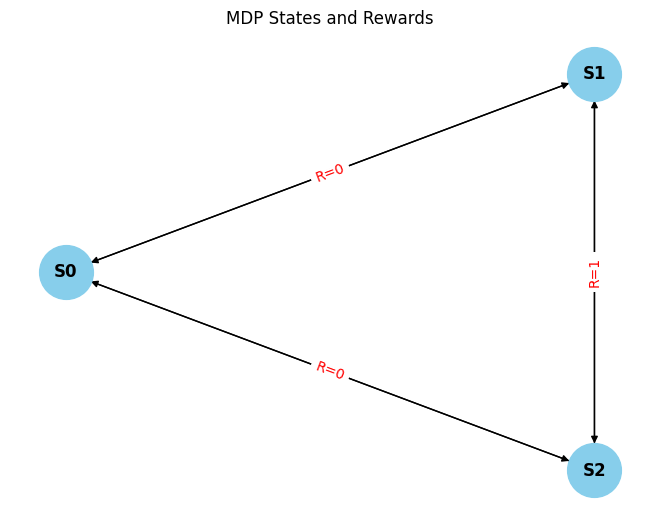

In [ ]:
G = nx.DiGraph()

states = ["S0", "S1", "S2"]

transitions = {
    ("S0", "S1"): 1,
    ("S0", "S2"): 0,
    ("S1", "S0"): 0,
    ("S1", "S2"): 1,
    ("S2", "S0"): 0,
    ("S2", "S1"): 1
}

for state in states:
    G.add_node(state)
for (start, end), reward in transitions.items():
    G.add_edge(start, end, label=f"Reward: {reward}")

pos = {
    "S0": (0, 1),
    "S1": (1, 2),
    "S2": (1, 0)}

nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)

edge_labels = {(start, end): f"R={reward}" for (start, end), reward in transitions.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)

plt.title("MDP States and Rewards")
plt.show()